In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
dataset = pd.read_csv("Facebook_ads.csv")

In [23]:
import math as m
T = 15000
num_ads = 10
ads_selected = []

no_of_selections = [0] * num_ads
sum_of_rewards = [0] * num_ads
total_rewards = 0

#print(no_of_selections)

for n in range(T):
  #print('n = ', n)
  ad = 0
  max_upper_confidence = 0
  for i in range(num_ads):
    #print('i = ', i)
    #print(no_of_selections[i])
    if no_of_selections[i] > 0:
      av_reward = sum_of_rewards[i] / no_of_selections[i]
      delta_i = m.sqrt(3/2 * (m.log(n+1)/no_of_selections[i]))
      upper_confidence_bound = av_reward + delta_i
      #print(av_reward)
      #print(delta_i)
      #print(upper_confidence_bound)
    else:
      upper_confidence_bound = 1e400
    if upper_confidence_bound > max_upper_confidence:
      max_upper_confidence = upper_confidence_bound
      #print(max_upper_confidence)
      ad = i
      #print(ad)
  ads_selected.append(ad)
  #print("ads_selected: ", ads_selected)
  no_of_selections[ad] = no_of_selections[ad] + 1
  #print("no_of_selections: ", no_of_selections)
  temp_reward = dataset.values[n, ad]
  #print("temp_reward: ", temp_reward)
  sum_of_rewards[ad] = sum_of_rewards[ad] + temp_reward
  total_rewards = total_rewards + temp_reward
  #print("sum_of_rewards: ", sum_of_rewards)
  #print("total_rewards: ", total_rewards)

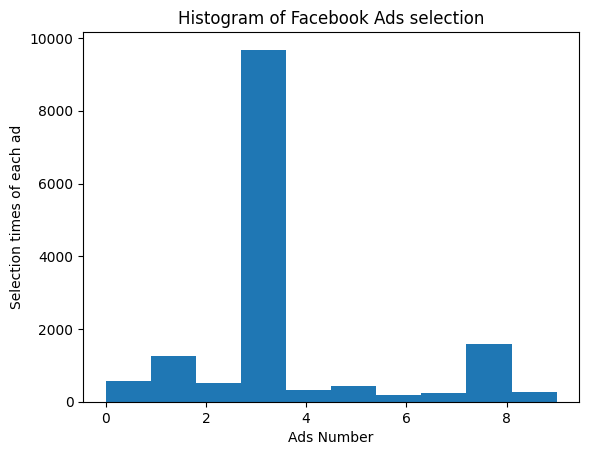

In [24]:
plt.hist(ads_selected)
plt.title("Histogram of Facebook Ads selection")
plt.xlabel("Ads Number")
plt.ylabel("Selection times of each ad")
plt.show()